In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering
from fuzzywuzzy import fuzz, process
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy import stats
sns.set_theme(style="white")

In [50]:
path = '../data/Data SESAME S1 int.xlsx'
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Columns: 146 entries, Prénom usuel to Classement.L
dtypes: float64(140), object(6)
memory usage: 652.6+ KB


In [51]:
print(df.select_dtypes(include=['object']).columns)


Index(['Prénom usuel', 'Prénom', 'Nom', 'Sexe', 'Région d'origine',
       'Seriation'],
      dtype='object')


In [5]:
colonnes_a_convertir = ['EC1-RelInt-UE13.CC', 'EC1-RelInt-UE13.CT', 'EC1-HisCap-UE18.CC', 'EC1-HisCap-UE18.CT']
for col in colonnes_a_convertir:
    df[col] = df[col].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [14]:
colonnes_a_convertir = ['EC1-RelInt-UE13.CC', 'EC1-RelInt-UE13.CT', 'EC1-HisCap-UE18.CC', 'EC1-HisCap-UE18.CT']
for col in colonnes_a_convertir:
    df[col] = df[col].astype(float)

In [33]:
regions = df['Région d\'origine']
regions_correctes= ["Fitovinany", "Atsimo Andrefana", "Menabe", "Haute Matsiatra", "Vakinankaratra", "Boeny", "SAVA", "Tsiroanomandidy", "Atsimo-Andrefana", "Sofia", "Ihorombe", "Itasy","Antsinanana", "Vatovavy", "Analanjirofo", "Alaotra Mangoro", "Atsimo Atsinanana", "Melaky", "DIANA", "Anosy", "Bongolava", "Amoron'i Mania", "BETSIBOKA"]

# Correction des erreurs de typographie dans la colonne Région d'origine


In [34]:
def trouver_correspondance(region):
    if isinstance(region, str):  # Vérifier si la valeur est une chaîne de caractères
        correspondance = process.extractOne(region, regions_correctes, scorer=fuzz.token_set_ratio)
        if correspondance[1] >= 90:  # Ajustez le seuil en fonction de la similarité souhaitée
            return correspondance[0]
    return region 

In [35]:
#Application des corrections au fichier
regions_corrigees = regions.apply(trouver_correspondance)

In [36]:
df['Région d\'origine'] = regions_corrigees

# Encodage de la colonne Région d'origine avec One Hot

In [10]:
region_origine = df['Région d\'origine']

In [11]:
#J'ai décidé de remplacer les lignes manquante ou de valeur zero par la ville qui se répète le plus
#Identification du nom de la ville répétitif
region_statistique = df['Région d\'origine'].mode()[0]

#Remplacement
df['Région d\'origine'].fillna(region_statistique, inplace=True)
df['Région d\'origine'].replace(0,region_statistique, inplace=True)

df.to_excel(path, index=False)


In [12]:
df['Région d\'origine'].unique()

array(['Analamanga', 'Vakinankaratra', 'Menabe', 'Atsimo Andrefana',
       'Boeny', 'Fitovinany', 'SAVA', 'Sofia', 'Alaotra Mangoro',
       'Haute Matsiatra', 'Ihorombe', 'Antsinanana', 'Analanjirofo',
       'Itasy', 'Atsimo Atsinanana', 'DIANA', 'Melaky', 'Bongolava',
       'Anosy', "Amoron'i Mania", 'Vatovavy', 'ANALAMANGA', 'ANÔSY',
       'BETSIBOKA', 'Tsiroanomandidy'], dtype=object)

In [13]:
df[''].unique()

KeyError: ''

In [21]:
#Encodage de la colonne région d'origine
encoder = LabelBinarizer()
encoder_region = encoder.fit_transform(df['Région d\'origine'])
print (encoder_region)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<Axes: >

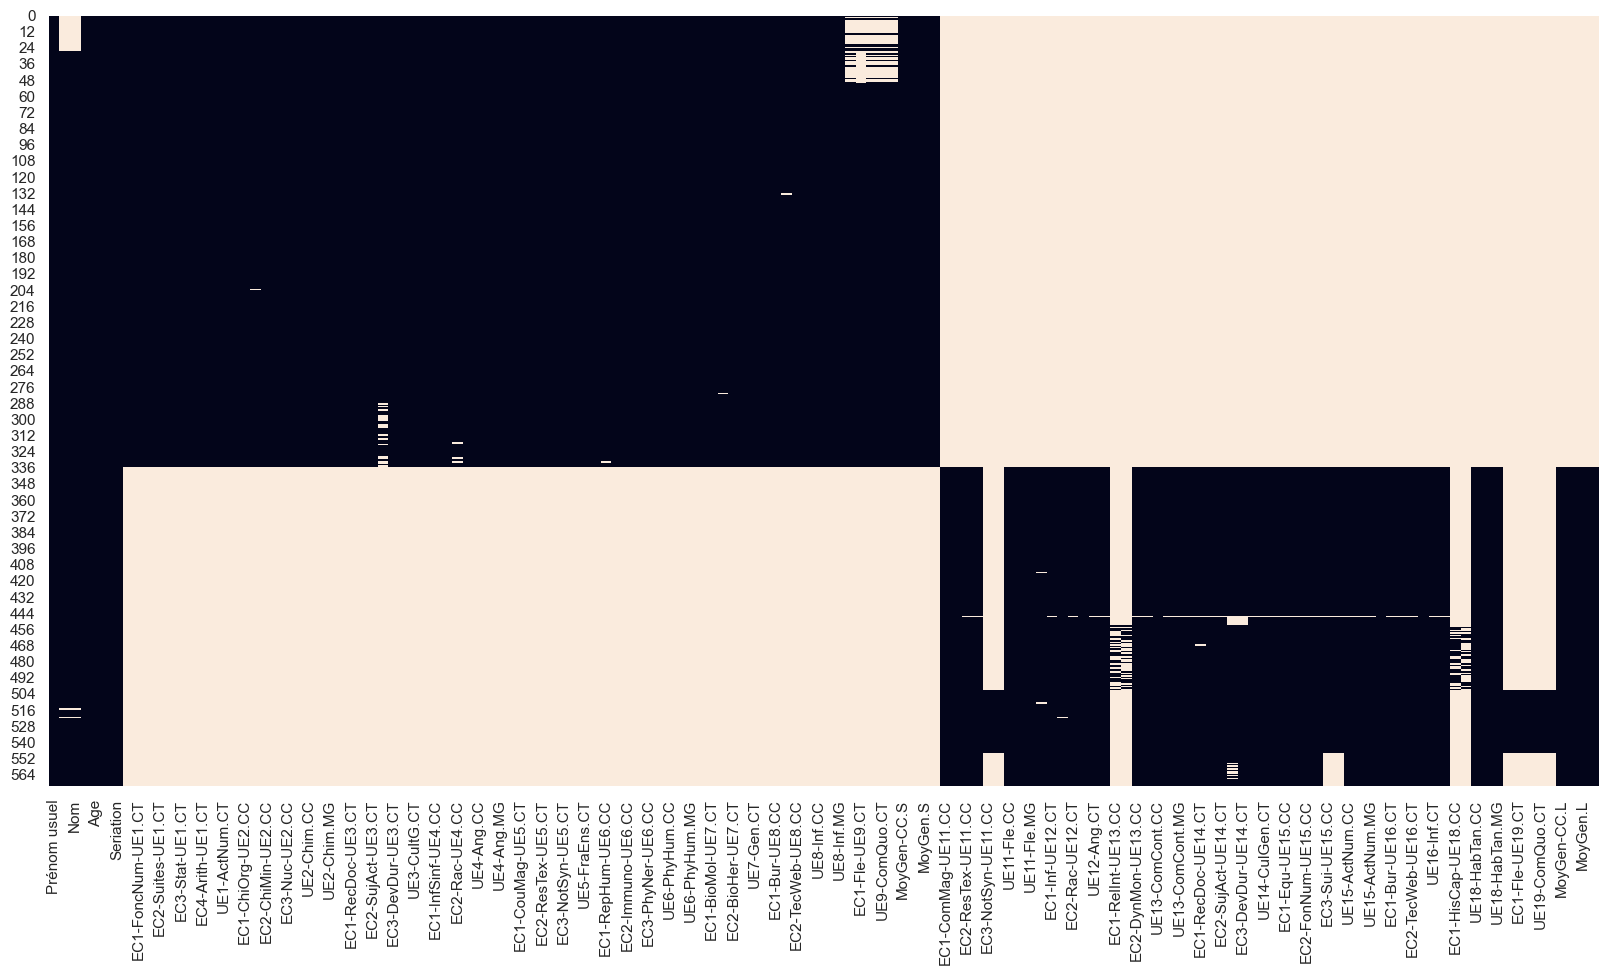

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df.isna(),
    cbar=False,
)

# Division en 2 groupes: DATA L et S

In [38]:
# Séparation des données pour la mention "S"
donnees_mention_S = df[df['Seriation'] == 'S']

# Séparation des données pour la mention "L"
donnees_mention_L = df[df['Seriation'] == 'L']

In [39]:
# Etude des informations concernant le sexe sur les S
donnees_mention_S.groupby("Sexe")["Classement.S"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
F,160.0,27.418750,18.100513,1.0,12.75,25.0,40.0,91.0
G,175.0,25.502857,17.620480,1.0,11.50,23.0,37.0,78.0


In [40]:
# Etude des informations concernant le sexe sur les L

donnees_mention_L.groupby("Sexe")["Classement.L"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
F,119.0,16.310924,11.896979,1.0,7.0,14.0,22.00,48.0
G,118.0,18.279661,11.889006,1.0,10.0,17.0,23.75,48.0


In [44]:
print("Type de données pour 'age':", donnees_mention_L['Age'].dtype)

Type de données pour 'age': float64


In [45]:
donnees_mention_L['Age'] = donnees_mention_L['Age'].round().astype(int)


C:\Users\FX506LH\AppData\Local\Temp\ipykernel_6236\3198813800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_mention_L['Age'] = donnees_mention_L['Age'].round().astype(int)


In [47]:
print(donnees_mention_L["Classement.S"].isna().sum())

237


In [48]:
nombre_de_lignes = donnees_mention_L.shape[0]
print("Nombre de lignes :", nombre_de_lignes)


Nombre de lignes : 237


In [46]:
donnees_mention_L.groupby("Age")["Classement.S"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Age'>

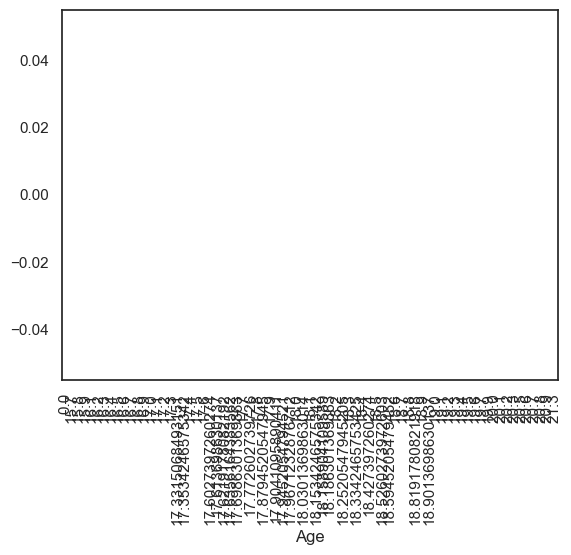

In [42]:
donnees_mention_L.groupby("Age")["Classement.S"].describe()['mean'].plot.bar()

<Axes: >

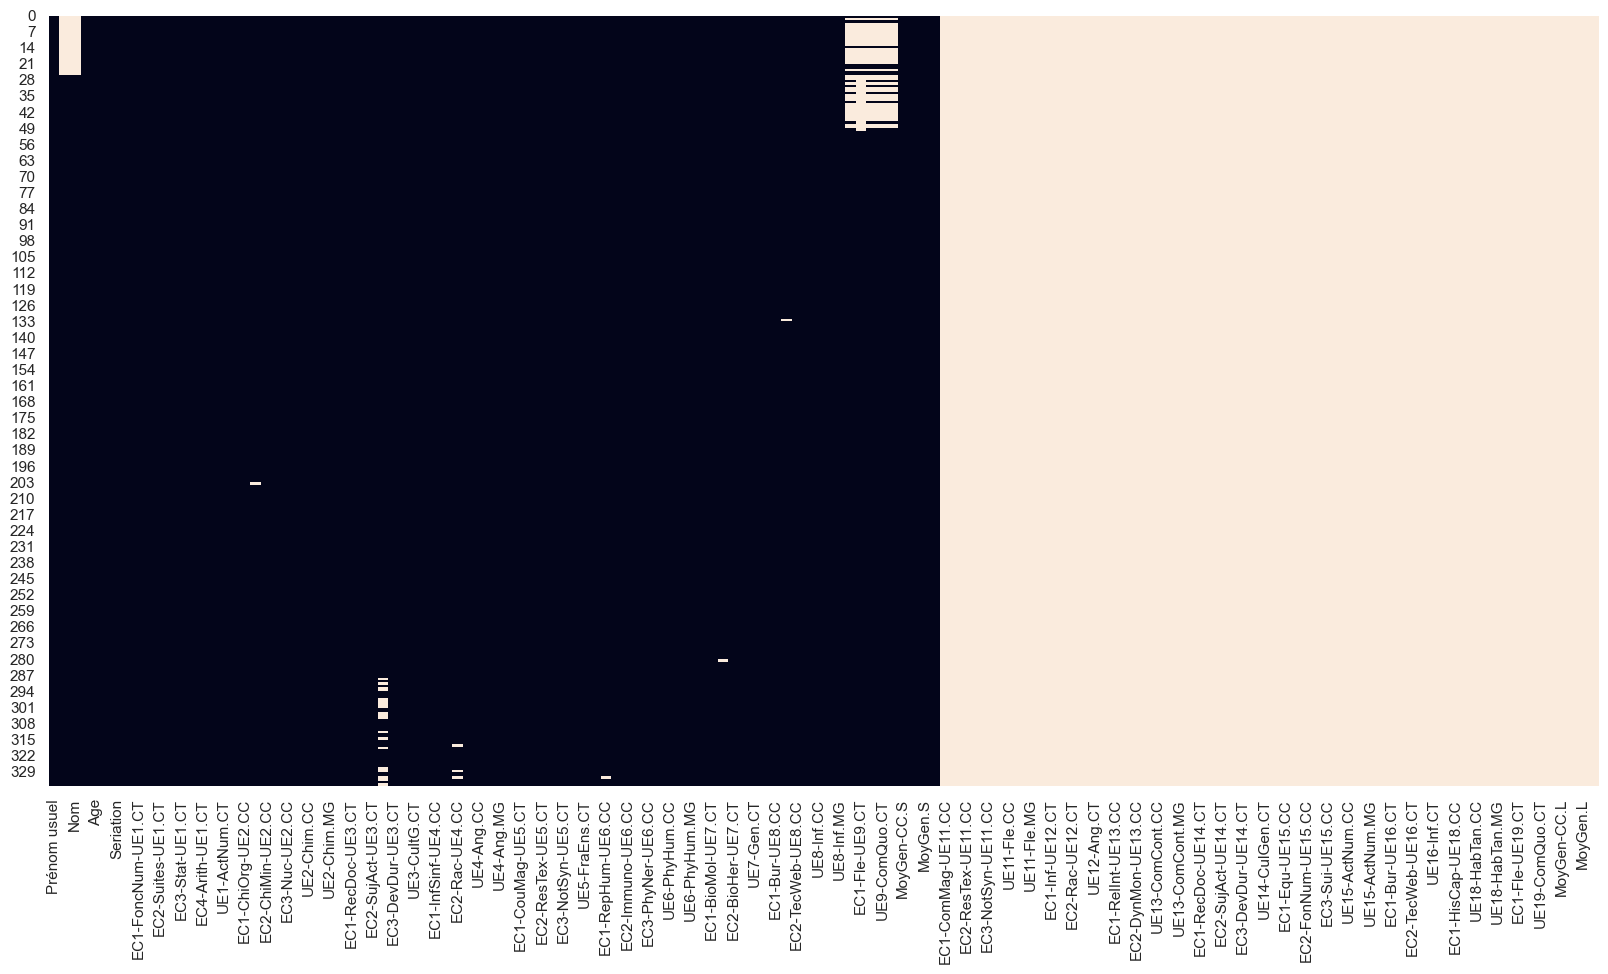

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_S.isna(),
    cbar=False,
)

<Axes: >

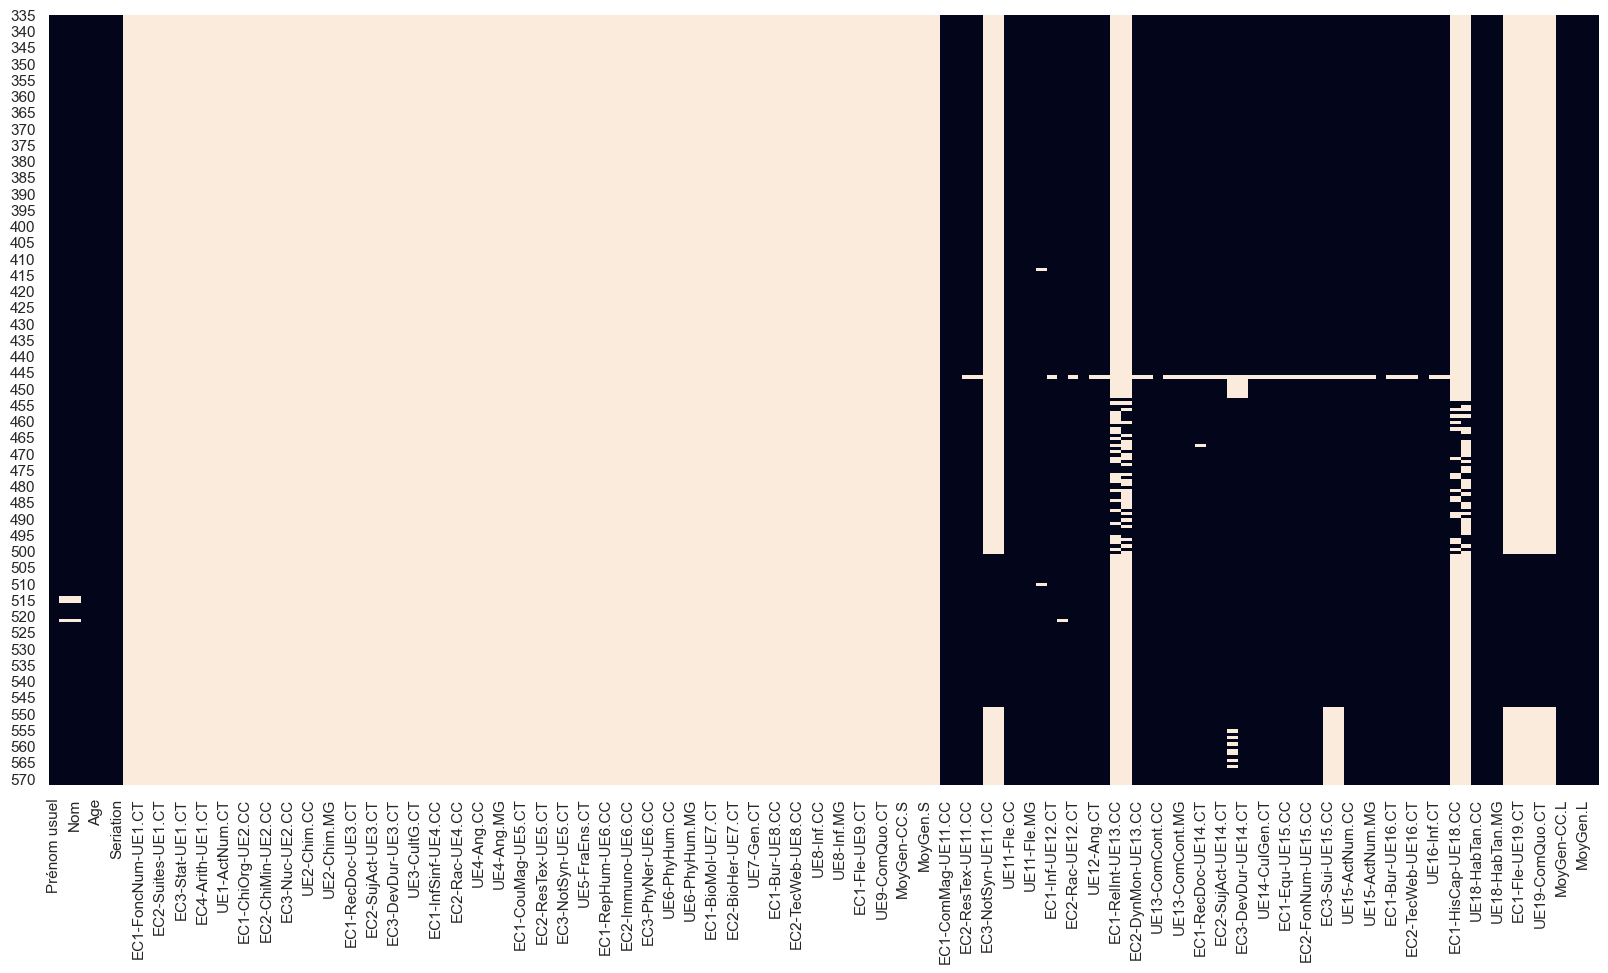

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_L.isna(),
    cbar=False,
)

#Etude sur les données des scientifiques

In [18]:
# Statistiques descriptives pour la mention "S"
print("Statistiques descriptives pour la mention 'S':")
print(donnees_mention_S.describe())

Statistiques descriptives pour la mention 'S':
              Age  EC1-FoncNum-UE1.CC  EC1-FoncNum-UE1.CT  EC2-Suites-UE1.CC  \
count  335.000000          335.000000          335.000000         335.000000   
mean    18.239403           12.483433            6.337313          11.440896   
std      1.070424            3.626045            3.652632           4.580828   
min     14.100000            2.500000            0.000000           0.000000   
25%     17.600000           10.000000            3.500000           8.400000   
50%     18.300000           12.800000            5.500000          12.000000   
75%     19.000000           15.150000            8.500000          15.100000   
max     21.500000           20.000000           17.500000          20.000000   

       EC2-Suites-UE1.CT  EC3-Stat-UE1.CC  EC3-Stat-UE1.CT  EC4-Arith-UE1.CC  \
count         335.000000       335.000000       335.000000        335.000000   
mean            7.552985        13.372239         8.552239         13.85

In [17]:
#Pour avoir la liste des colonnes à supprimer pour les S 
#Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = donnees_mention_S.isna().mean() * 100

# Identifier les colonnes ayant plus de 95% de valeurs manquantes
colonnes_vide_95 = pourcentage_valeurs_manquantes[pourcentage_valeurs_manquantes > 95].index.tolist()

print(colonnes_vide_95)

['EC1-ComMag-UE11.CC', 'EC1-ComMag-UE11.CT', 'EC2-ResTex-UE11.CC', 'EC2-ResTex-UE11.CT', 'EC3-NotSyn-UE11.CC', 'EC3-NotSyn-UE11.CT', 'UE11-Fle.CC', 'UE11-Fle.CT', 'UE11-Fle.MG', 'EC1-Inf-UE12.CC', 'EC1-Inf-UE12.CT', 'EC2-Rac-UE12.CC', 'EC2-Rac-UE12.CT', 'UE12-Ang.CC', 'UE12-Ang.CT', 'UE12-Ang.MG', 'EC1-RelInt-UE13.CC', 'EC1-RelInt-UE13.CT', 'EC2-DynMon-UE13.CC', 'EC2-DynMon-UE13.CT', 'UE13-ComCont.CC', 'UE13-ComCont.CT', 'UE13-ComCont.MG', 'EC1-RecDoc-UE14.CC', 'EC1-RecDoc-UE14.CT', 'EC2-SujAct-UE14.CC', 'EC2-SujAct-UE14.CT', 'EC3-DevDur-UE14.CC', 'EC3-DevDur-UE14.CT', 'UE14-CulGen.CC', 'UE14-CulGen.CT', 'UE14-CulGen.MG', 'EC1-Equ-UE15.CC', 'EC1-Equ-UE15.CT', 'EC2-FonNum-UE15.CC', 'EC2-FonNum-UE15.CT', 'EC3-Sui-UE15.CC', 'EC3-Sui-UE15.CT', 'UE15-ActNum.CC', 'UE15-ActNum.CT', 'UE15-ActNum.MG', 'EC1-Bur-UE16.CC', 'EC1-Bur-UE16.CT', 'EC2-TecWeb-UE16.CC', 'EC2-TecWeb-UE16.CT', 'UE16-Inf.CC', 'UE16-Inf.CT', 'UE16-Inf.MG', 'EC1-HisCap-UE18.CC', 'EC1-HisCap-UE18.CT', 'UE18-HabTan.CC', 'UE18-H

In [28]:
#Suppression des colonnes non pertinentes pour le DataFrame des S
colonnes_a_supprimer_S = ['EC1-ComMag-UE11.CC', 'EC1-ComMag-UE11.CT', 'EC2-ResTex-UE11.CC', 'EC2-ResTex-UE11.CT', 'EC3-NotSyn-UE11.CC', 'EC3-NotSyn-UE11.CT', 
                          'UE11-Fle.CC', 'UE11-Fle.CT', 'UE11-Fle.MG', 'EC1-Inf-UE12.CC', 'EC1-Inf-UE12.CT', 'EC2-Rac-UE12.CC', 'EC2-Rac-UE12.CT', 'UE12-Ang.CC', 
                          'UE12-Ang.CT', 'UE12-Ang.MG', 'EC1-RelInt-UE13.CC', 'EC1-RelInt-UE13.CT', 'EC2-DynMon-UE13.CC', 'EC2-DynMon-UE13.CT', 'UE13-ComCont.CC', 
                          'UE13-ComCont.CT', 'UE13-ComCont.MG', 'EC1-RecDoc-UE14.CC', 'EC1-RecDoc-UE14.CT', 'EC2-SujAct-UE14.CC', 'EC2-SujAct-UE14.CT', 'EC3-DevDur-UE14.CC', 
                          'EC3-DevDur-UE14.CT', 'UE14-CulGen.CC', 'UE14-CulGen.CT', 'UE14-CulGen.MG', 'EC1-Equ-UE15.CC', 'EC1-Equ-UE15.CT', 'EC2-FonNum-UE15.CC', 
                          'EC2-FonNum-UE15.CT', 'EC3-Sui-UE15.CC', 'EC3-Sui-UE15.CT', 'UE15-ActNum.CC', 'UE15-ActNum.CT', 'UE15-ActNum.MG', 'EC1-Bur-UE16.CC', 'EC1-Bur-UE16.CT', 
                          'EC2-TecWeb-UE16.CC', 'EC2-TecWeb-UE16.CT', 'UE16-Inf.CC', 'UE16-Inf.CT', 'UE16-Inf.MG', 'EC1-HisCap-UE18.CC', 'EC1-HisCap-UE18.CT', 'UE18-HabTan.CC', 'UE18-HabTan.CT', 'UE18-HabTan.MG', 'EC1-Fle-UE19.CC', 
                          'EC1-Fle-UE19.CT', 'UE19-ComQuo.CC', 'UE19-ComQuo.CT', 'UE19-ComQuo.MG', 'MoyGen-CC.L', 'MoyGen-CT.L', 'MoyGen.L', 'Classement.L']
donnees_mention_S = donnees_mention_S.drop(colonnes_a_supprimer_S, axis=1)

<Axes: >

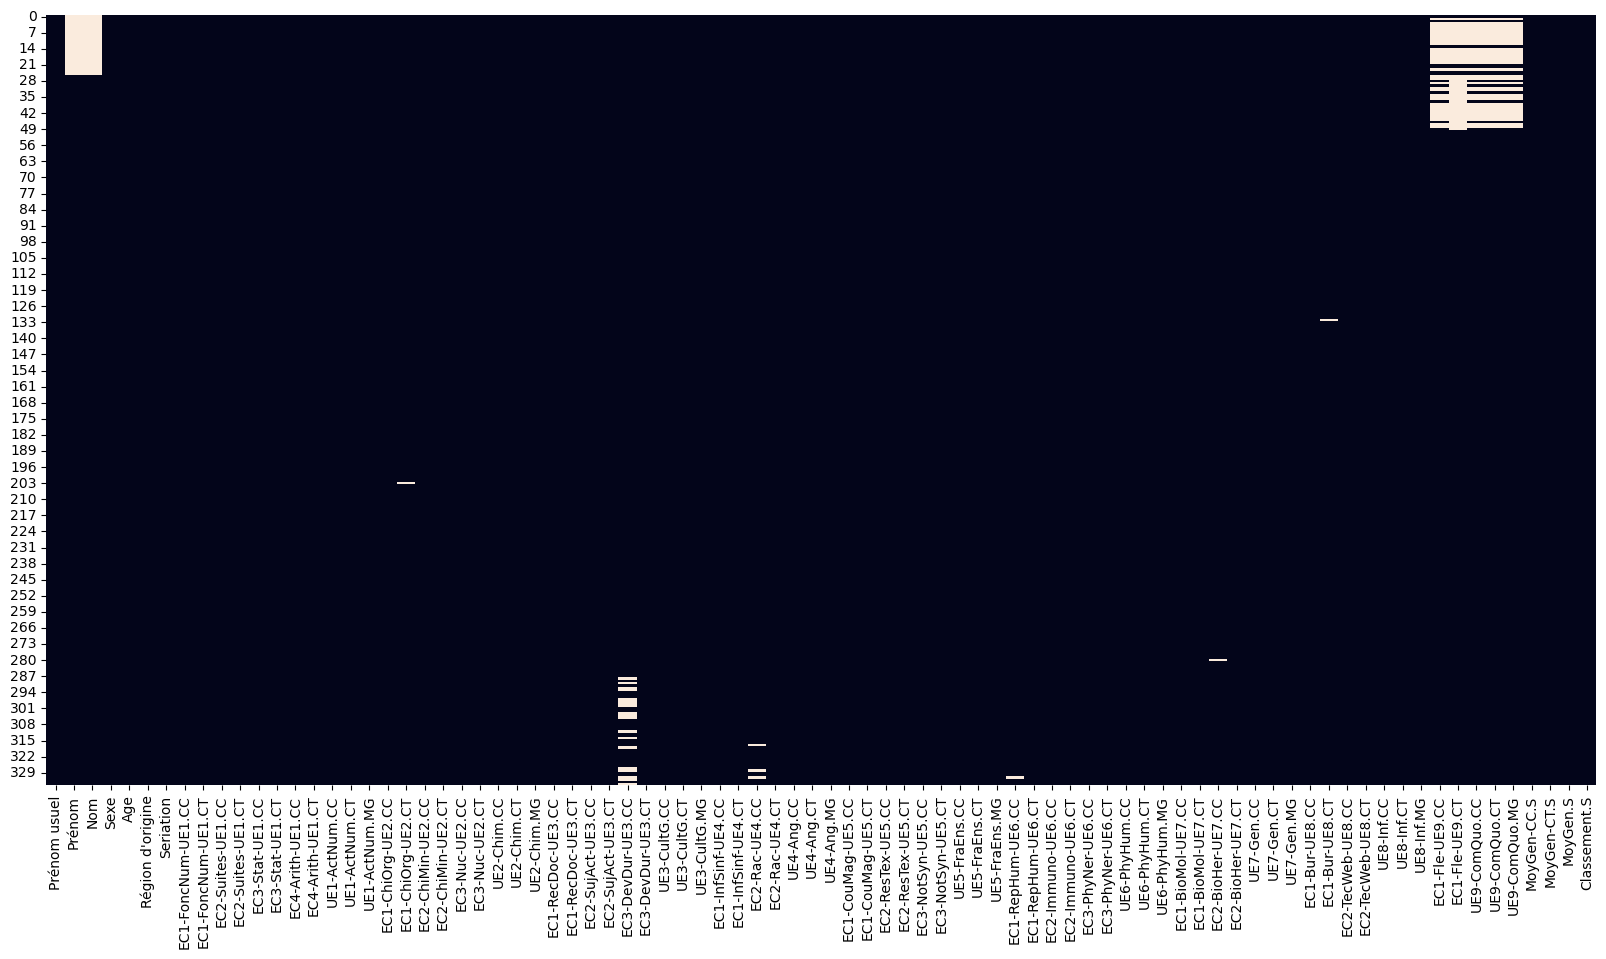

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_S.isna(),
    cbar=False,
)


#Etude sur les données des littérares

In [19]:
# Statistiques descriptives pour la mention "L"
print("Statistiques descriptives pour la mention 'L':")
print(donnees_mention_L.describe())

Statistiques descriptives pour la mention 'L':
              Age  EC1-FoncNum-UE1.CC  EC1-FoncNum-UE1.CT  EC2-Suites-UE1.CC  \
count  237.000000                 0.0                 0.0                0.0   
mean    18.103919                 NaN                 NaN                NaN   
std      1.595672                 NaN                 NaN                NaN   
min      0.000000                 NaN                 NaN                NaN   
25%     17.500000                 NaN                 NaN                NaN   
50%     18.100000                 NaN                 NaN                NaN   
75%     18.819178                 NaN                 NaN                NaN   
max     21.300000                 NaN                 NaN                NaN   

       EC2-Suites-UE1.CT  EC3-Stat-UE1.CC  EC3-Stat-UE1.CT  EC4-Arith-UE1.CC  \
count                0.0              0.0              0.0               0.0   
mean                 NaN              NaN              NaN              

In [30]:
#Pour avoir la liste des colonnes à supprimer pour les L 
#Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = donnees_mention_L.isna().mean() * 100

# Identifier les colonnes ayant plus de 95% de valeurs manquantes
colonnes_vide_95 = pourcentage_valeurs_manquantes[pourcentage_valeurs_manquantes > 95].index.tolist()

print(colonnes_vide_95)

['EC1-FoncNum-UE1.CC', 'EC1-FoncNum-UE1.CT', 'EC2-Suites-UE1.CC', 'EC2-Suites-UE1.CT', 'EC3-Stat-UE1.CC', 'EC3-Stat-UE1.CT', 'EC4-Arith-UE1.CC', 'EC4-Arith-UE1.CT', 'UE1-ActNum.CC', 'UE1-ActNum.CT', 'UE1-ActNum.MG', 'EC1-ChiOrg-UE2.CC', 'EC1-ChiOrg-UE2.CT', 'EC2-ChiMin-UE2.CC', 'EC2-ChiMin-UE2.CT', 'EC3-Nuc-UE2.CC', 'EC3-Nuc-UE2.CT', 'UE2-Chim.CC', 'UE2-Chim.CT', 'UE2-Chim.MG', 'EC1-RecDoc-UE3.CC', 'EC1-RecDoc-UE3.CT', 'EC2-SujAct-UE3.CC', 'EC2-SujAct-UE3.CT', 'EC3-DevDur-UE3.CC', 'EC3-DevDur-UE3.CT', 'UE3-CultG.CC', 'UE3-CultG.CT', 'UE3-CultG.MG', 'EC1-InfSinf-UE4.CC', 'EC1-InfSinf-UE4.CT', 'EC2-Rac-UE4.CC', 'EC2-Rac-UE4.CT', 'UE4-Ang.CC', 'UE4-Ang.CT', 'UE4-Ang.MG', 'EC1-CouMag-UE5.CC', 'EC1-CouMag-UE5.CT', 'EC2-ResTex-UE5.CC', 'EC2-ResTex-UE5.CT', 'EC3-NotSyn-UE5.CC', 'EC3-NotSyn-UE5.CT', 'UE5-FraEns.CC', 'UE5-FraEns.CT', 'UE5-FraEns.MG', 'EC1-RepHum-UE6.CC', 'EC1-RepHum-UE6.CT', 'EC2-Immuno-UE6.CC', 'EC2-Immuno-UE6.CT', 'EC3-PhyNer-UE6.CC', 'EC3-PhyNer-UE6.CT', 'UE6-PhyHum.CC', 'UE

In [31]:
#Suppression des colonnes non pertinentes pour le DataFrame des L
colonnes_a_supprimer_L= ['EC1-FoncNum-UE1.CC', 'EC1-FoncNum-UE1.CT', 'EC2-Suites-UE1.CC', 'EC2-Suites-UE1.CT', 'EC3-Stat-UE1.CC', 'EC3-Stat-UE1.CT', 'EC4-Arith-UE1.CC',
                          'EC4-Arith-UE1.CT', 'UE1-ActNum.CC', 'UE1-ActNum.CT', 'UE1-ActNum.MG', 'EC1-ChiOrg-UE2.CC', 'EC1-ChiOrg-UE2.CT', 'EC2-ChiMin-UE2.CC', 'EC2-ChiMin-UE2.CT', 
                          'EC3-Nuc-UE2.CC', 'EC3-Nuc-UE2.CT', 'UE2-Chim.CC', 'UE2-Chim.CT', 'UE2-Chim.MG', 'EC1-RecDoc-UE3.CC', 'EC1-RecDoc-UE3.CT', 'EC2-SujAct-UE3.CC', 'EC2-SujAct-UE3.CT',
                        'EC3-DevDur-UE3.CC', 'EC3-DevDur-UE3.CT', 'UE3-CultG.CC', 'UE3-CultG.CT', 'UE3-CultG.MG', 'EC1-InfSinf-UE4.CC', 'EC1-InfSinf-UE4.CT', 'EC2-Rac-UE4.CC', 'EC2-Rac-UE4.CT',
                         'UE4-Ang.CC', 'UE4-Ang.CT', 'UE4-Ang.MG', 'EC1-CouMag-UE5.CC', 'EC1-CouMag-UE5.CT', 'EC2-ResTex-UE5.CC', 'EC2-ResTex-UE5.CT', 'EC3-NotSyn-UE5.CC', 'EC3-NotSyn-UE5.CT', 
                         'UE5-FraEns.CC', 'UE5-FraEns.CT', 'UE5-FraEns.MG', 'EC1-RepHum-UE6.CC', 'EC1-RepHum-UE6.CT', 'EC2-Immuno-UE6.CC', 'EC2-Immuno-UE6.CT', 'EC3-PhyNer-UE6.CC', 'EC3-PhyNer-UE6.CT',
                           'UE6-PhyHum.CC', 'UE6-PhyHum.CT', 'UE6-PhyHum.MG', 'EC1-BioMol-UE7.CC', 'EC1-BioMol-UE7.CT', 'EC2-BioHer-UE7.CC', 'EC2-BioHer-UE7.CT', 'UE7-Gen.CC', 'UE7-Gen.CT', 'UE7-Gen.MG', 
                           'EC1-Bur-UE8.CC', 'EC1-Bur-UE8.CT', 'EC2-TecWeb-UE8.CC', 'EC2-TecWeb-UE8.CT', 'UE8-Inf.CC', 'UE8-Inf.CT', 'UE8-Inf.MG', 'EC1-Fle-UE9.CC', 'EC1-Fle-UE9.CT', 'UE9-ComQuo.CC', 'UE9-ComQuo.CT', 
                           'UE9-ComQuo.MG', 'MoyGen-CC.S', 'MoyGen-CT.S', 'MoyGen.S', 'Classement.S']
donnees_mention_L = donnees_mention_L.drop(colonnes_a_supprimer_L, axis=1)

<Axes: >

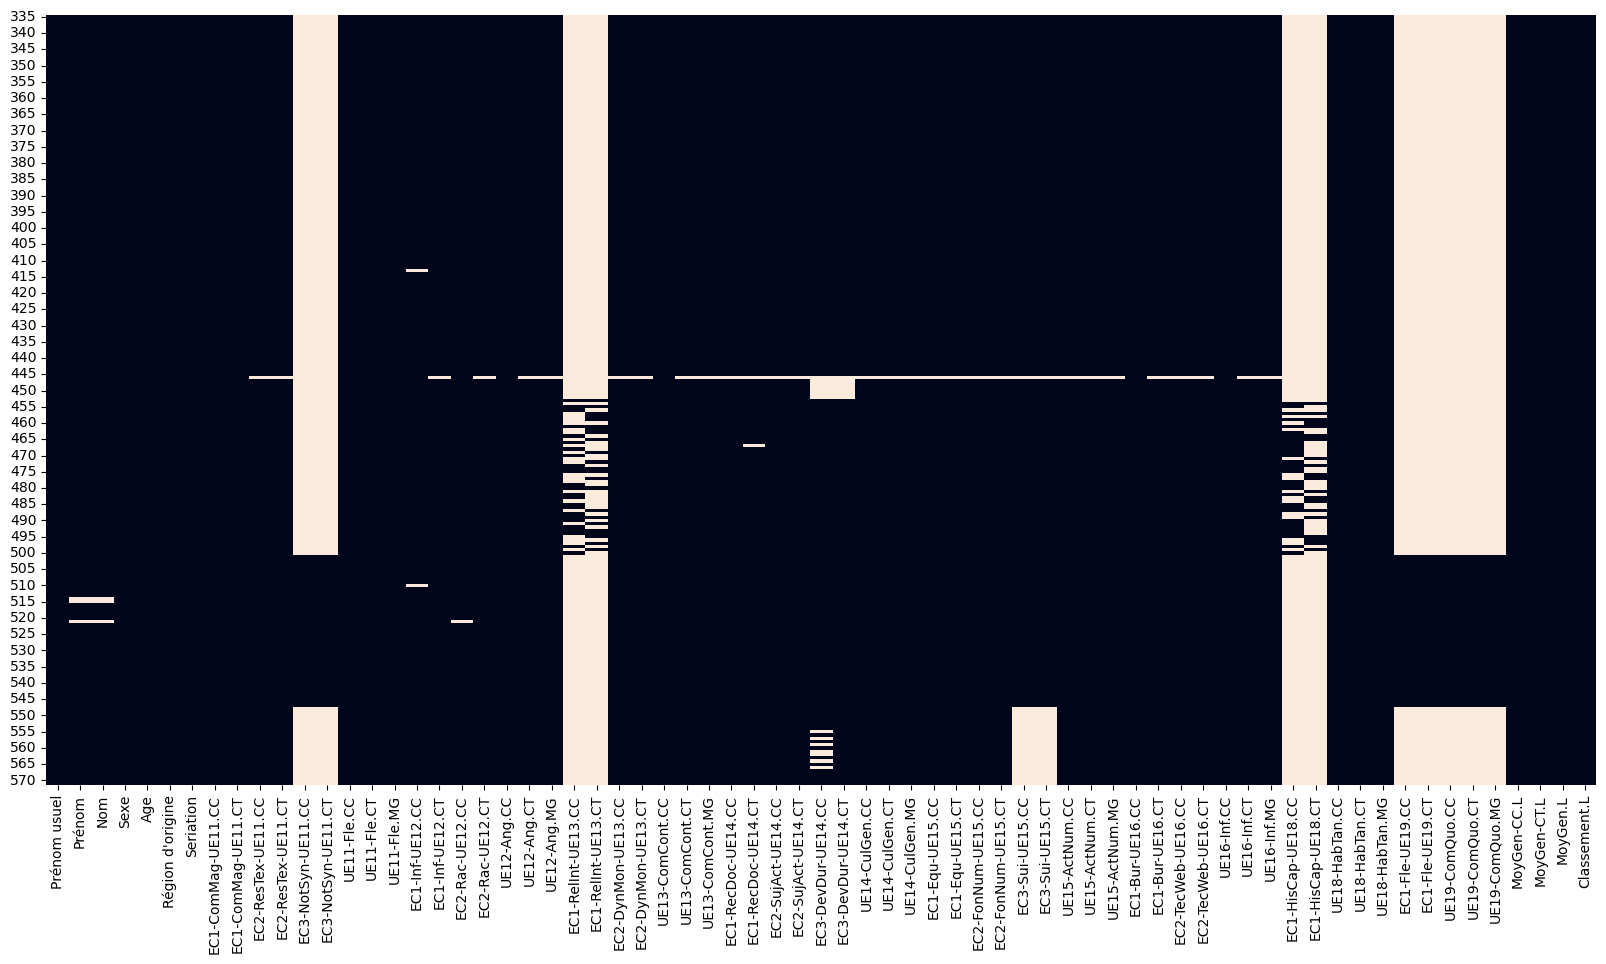

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_L.isna(),
    cbar=False,
)